#Importing Libraries

In [ ]:
#Importing Libraries
import numpy as np
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis and Data Pre-Processing

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(cancer.DESCR[27:3130])


Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radius, field
        10 is Rad

In [ ]:
X = pd.DataFrame(cancer.data, columns = cancer.feature_names)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

**As the data is clean and has no missing value, the cleaning step can be skipped.**

In [ ]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
y = pd.DataFrame(cancer.target, columns=['target'])
y['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

**According to the dataset's description, the distribution of the target variable is: 212 - Malignant, 357 - Benign. Thus, 'benign' and 'maglinant' are presented as 1 and 0, respectively.**

In [ ]:
data = pd.concat([X, y], axis=1)

In [ ]:
data['target'] = data['target'].apply(lambda x: "Benign"
                                  if x == 1 else "Malignant")
data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Malignant


In [ ]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# Set style
sns.set_style('darkgrid')

In [ ]:
data.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


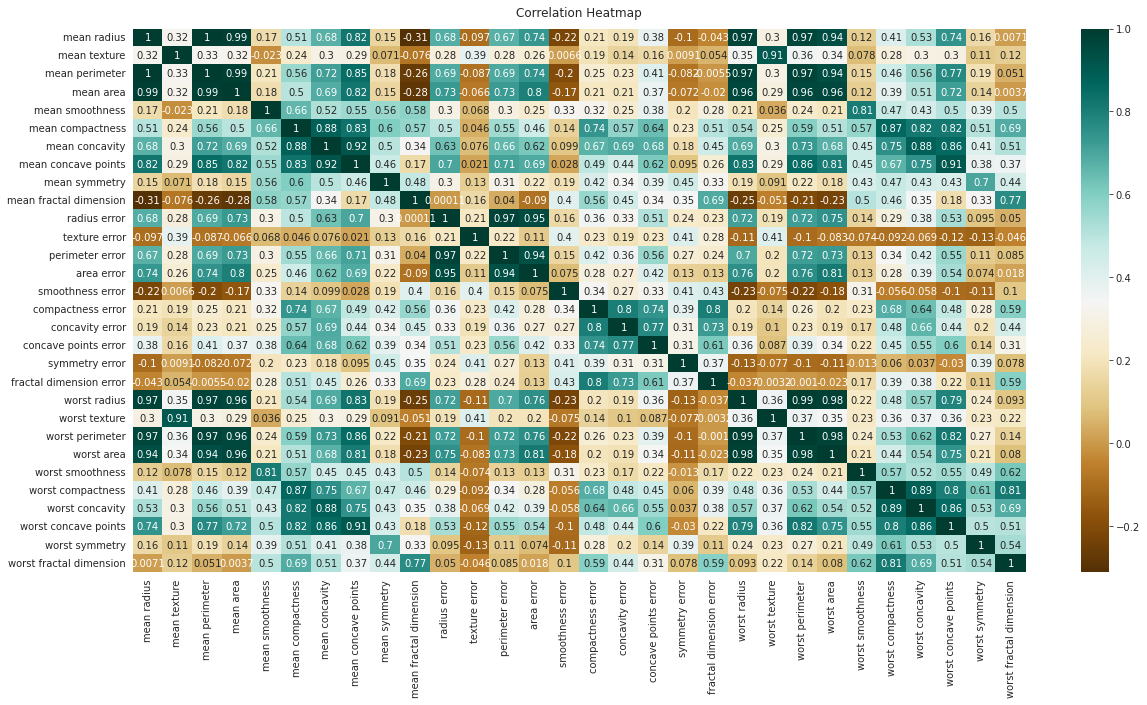

In [ ]:
# PLOTTING HEATMAP FOR VISUALISING CORRELATION BETWEEN FEATURES
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(data.corr(),cmap='BrBG',annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Text(0.5, 1.0, 'Count Plot of Diagnosis')

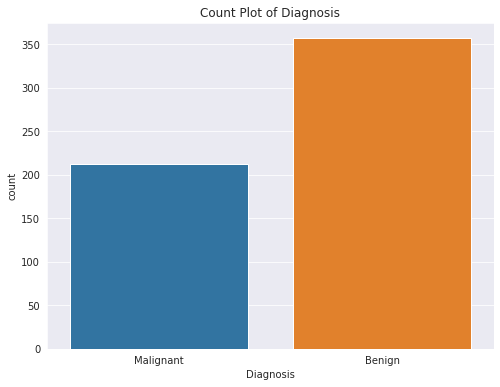

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data['target'])
plt.xlabel("Diagnosis")
plt.title("Count Plot of Diagnosis")

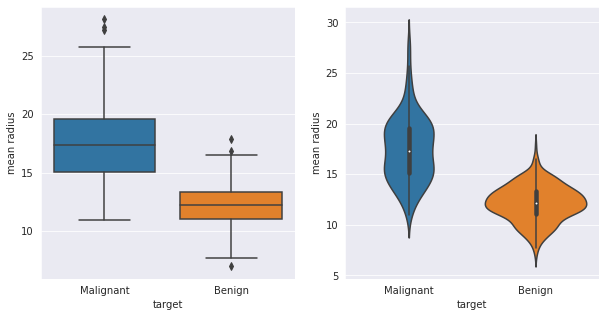

In [ ]:
# Plotting correlation between diagnosis and radius

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="target", y="mean radius", data=data)
plt.subplot(1,2,2)
sns.violinplot(x="target", y="mean radius", data=data)
plt.show()

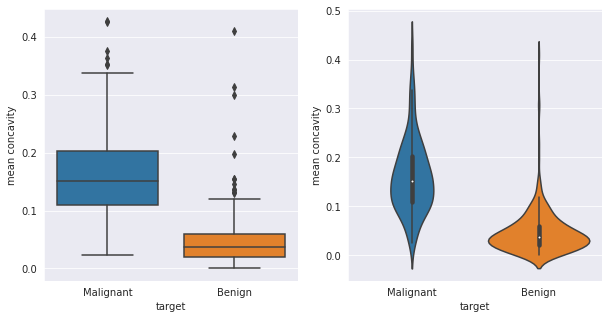

In [ ]:
# Plotting correlation between diagnosis and concativity

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="target", y="mean concavity", data=data)
plt.subplot(1,2,2)
sns.violinplot(x="target", y="mean concavity", data=data)
plt.show()

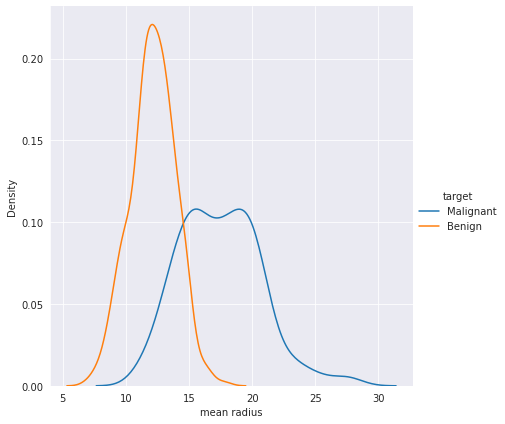

In [ ]:
    # Distribution density plot KDE (kernel density estimate)
sns.FacetGrid(data, hue="target", height=6).map(sns.kdeplot, "mean radius").add_legend()
plt.show()

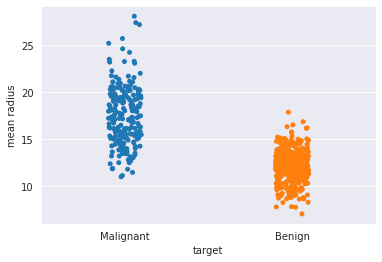

In [ ]:
# Plotting the distribution of the mean radius
sns.stripplot(x="target", y="mean radius", data=data, jitter=True, edgecolor="gray")
plt.show()

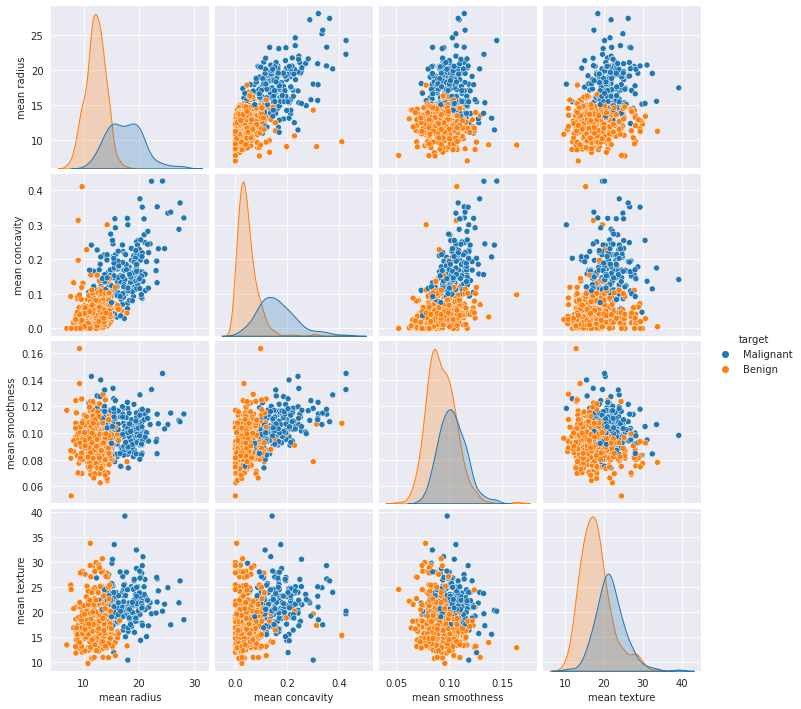

In [ ]:
# Plotting bivariate relations between each pair of features (4 features x4 so 16 graphs) with hue = "diagnosis"
sns.pairplot(data, hue="target", vars = ["mean radius", "mean concavity", "mean smoothness", "mean texture"])
plt.show() 

#Model Implementation(Without PCA)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

#### **K-Nearest-Neighbors (kNN)**

In [ ]:
#Making K-Nearest-Neighbors (KNN) Model
knn = KNeighborsClassifier(n_neighbors=1)
start = time.time()
knn.fit(X_train, y_train)
stop = time.time()
knn_time = f"{stop - start}"

In [ ]:
#Making predictions on test data
y_pred_knn = knn.predict(X_test)

#Displaying the predictions
y_pred_knn

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [ ]:
#AUC Score
auc_score_knn = roc_auc_score(y_test, knn.predict(X_test))
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
print("AUC Score:",auc_score_knn)

AUC Score: 0.9161480510972814


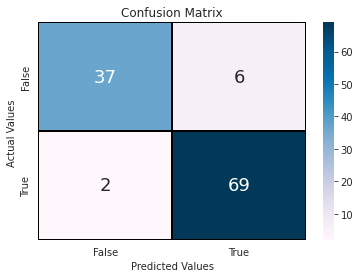

In [ ]:
#Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

#Plotting the confusion matrix
ax = sns.heatmap(cm_knn, annot=True, annot_kws={"fontsize":18}, cmap='PuBu', fmt='.3g', linewidths=1, linecolor='black')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        43
           1       0.92      0.97      0.95        71

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



#### **Random Forest Classifier**

In [ ]:
#Making DecisionTree Classifier Model
rfc = RandomForestClassifier()
start = time.time()
rfc.fit(X_train, y_train)
stop = time.time()
rfc_time = f"{stop - start}"

In [ ]:
#Making predictions on test data
y_pred_rfc = rfc.predict(X_test)

#Displaying the predictions
y_pred_rfc

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [ ]:
#AUC Score
auc_score_rfc = roc_auc_score(y_test, rfc.predict(X_test))
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
print("AUC Score:",auc_score_rfc)

AUC Score: 0.9580740255486406


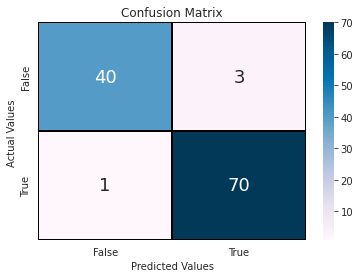

In [ ]:
#Confusion Matrix
cm_rfc = confusion_matrix(y_test, y_pred_rfc)

#Plotting the confusion matrix
ax = sns.heatmap(cm_rfc, annot=True, annot_kws={"fontsize":18}, cmap='PuBu', fmt='.3g', linewidths=1, linecolor='black')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



#### **Logistic Regression**

In [ ]:
#Making LogisticRegression Model
classifier = LogisticRegression()
start = time.time()
classifier.fit(X_train,y_train)
stop = time.time()
log_time = f"{stop - start}"

In [ ]:
#Making predictions on test data
y_pred_log = classifier.predict(X_test)

#Displaying the predictions
y_pred_log

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [ ]:
#AUC Score
auc_score_classifier = roc_auc_score(y_test, classifier.predict(X_test))
fpr_classifier, tpr_classifier, thresholds_classifier = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
print("AUC Score:",auc_score_classifier)

AUC Score: 0.9580740255486406


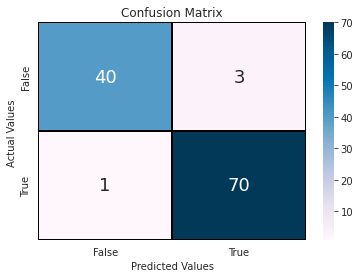

In [ ]:
#Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)

#Plotting the confusion matrix
ax = sns.heatmap(cm_log, annot=True, annot_kws={"fontsize":18}, cmap='PuBu', fmt='.3g', linewidths=1, linecolor='black')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



#### **Support Vector Machines (SVM) Linear**

In [ ]:
#Making Support Vector Machines (SVM) Model
svm = SVC(probability=True, kernel = 'linear')
start = time.time()
svm.fit(X_train, y_train)
stop = time.time()
svm_time = f"{stop - start}"

In [ ]:
#Making predictions on test data
y_pred_svm = svm.predict(X_test)

#Displaying the predictions
y_pred_svm

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [ ]:
#AUC Score
auc_score_svm = roc_auc_score(y_test, svm.predict(X_test))
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
print("AUC Score:",auc_score_svm)

AUC Score: 0.9464461185718965


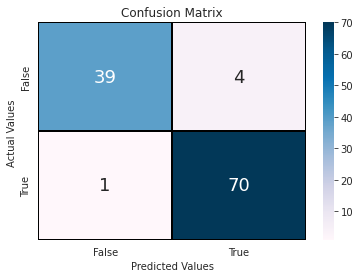

In [ ]:
#Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

#Plotting the confusion matrix
ax = sns.heatmap(cm_svm, annot=True, annot_kws={"fontsize":18}, cmap='PuBu', fmt='.3g', linewidths=1, linecolor='black')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



###### **ROC Curve**

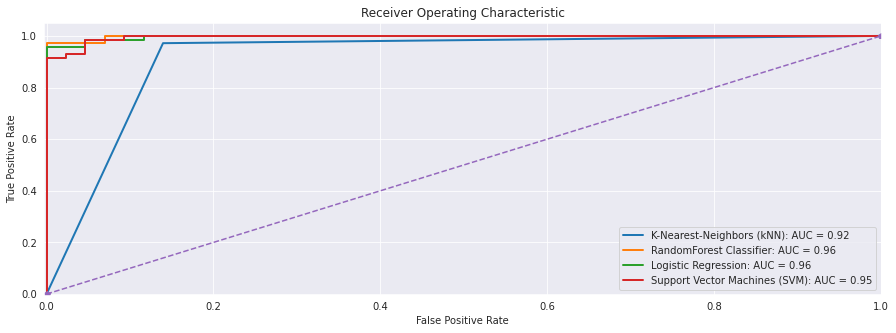

In [ ]:
#Plotting the ROC Curve
plt.figure(figsize=(15,5))
plt.plot(fpr_knn, tpr_knn, label='K-Nearest-Neighbors (kNN): AUC = %0.2f' % auc_score_knn, linewidth=2)
plt.plot(fpr_rfc, tpr_rfc, label='RandomForest Classifier: AUC = %0.2f' % auc_score_rfc, linewidth=2)
plt.plot(fpr_classifier, tpr_classifier, label='Logistic Regression: AUC = %0.2f' % auc_score_classifier, linewidth=2)
plt.plot(fpr_svm, tpr_svm, label='Support Vector Machines (SVM): AUC = %0.2f' % auc_score_svm, linewidth=2)
plt.plot([0, 1], [0, 1],'p--')
plt.xlim([-0.003, 1.0])
plt.ylim([-0.003, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

##### **Evaluation Metrics**

In [ ]:
accuracy_knn = accuracy_score(y_test,y_pred_knn)
accuracy_rfc=accuracy_score(y_test,y_pred_rfc)
accuracy_log=accuracy_score(y_test,y_pred_log)
accuracy_svm=accuracy_score(y_test,y_pred_svm)

In [ ]:
#Evaluation Metrics for different models
columns = ['Model(Without PCA)', 'Accuracy', 'Running Time(s)']
evaluation_met = pd.DataFrame(columns=columns)
evaluation_met['Model(Without PCA)'] = ['k-nearest neighborsClassifier', 'RandomForestClassifier', 'Logistic Regression', 'SVM(linear)']
evaluation_met['Accuracy'] = [accuracy_knn, accuracy_rfc, accuracy_log, accuracy_svm]
evaluation_met['Running Time(s)'] = [knn_time, rfc_time, log_time, svm_time]

evaluation_met

,Model(Without PCA),Accuracy,Running Time(s)
0,k-nearest neighborsClassifier,0.929825,0.006498813629150391
1,RandomForestClassifier,0.964912,0.4526083469390869
2,Logistic Regression,0.964912,0.12153863906860352
3,SVM(linear),0.956140,6.797774314880371


# Principal Component Analysis From scratch

In [ ]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix

array([[ 1.00176056e+00,  3.24351929e-01,  9.99612069e-01,
         9.89095475e-01,  1.70881506e-01,  5.07014640e-01,
         6.77955036e-01,  8.23976636e-01,  1.48001350e-01,
        -3.12179472e-01,  6.80285970e-01, -9.74887767e-02,
         6.75358538e-01,  7.37159198e-01, -2.22992026e-01,
         2.06362656e-01,  1.94545531e-01,  3.76831225e-01,
        -1.04504545e-01, -4.27163418e-02,  9.71245907e-01,
         2.97530545e-01,  9.66835698e-01,  9.42739295e-01,
         1.19826732e-01,  4.14190751e-01,  5.27839123e-01,
         7.45524434e-01,  1.64241985e-01,  7.07832563e-03],
       [ 3.24351929e-01,  1.00176056e+00,  3.30113223e-01,
         3.21650988e-01, -2.34296930e-02,  2.37118951e-01,
         3.02950254e-01,  2.93980713e-01,  7.15266864e-02,
        -7.65717560e-02,  2.76354360e-01,  3.87037830e-01,
         2.82169018e-01,  2.60302460e-01,  6.62542133e-03,
         1.92312595e-01,  1.43545353e-01,  1.64139495e-01,
         9.14323671e-03,  5.45533955e-02,  3.53193674e-

In [ ]:
np.set_printoptions(formatter={'float_kind':'{:.2f}'.format})
values, vectors = np.linalg.eig(cov_matrix)
values = np.array(values)
values

array([13.30, 5.70, 2.82, 1.98, 1.65, 1.21, 0.68, 0.48, 0.42, 0.35, 0.29,
       0.26, 0.24, 0.16, 0.09, 0.08, 0.06, 0.05, 0.05, 0.00, 0.00, 0.00,
       0.01, 0.01, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03])

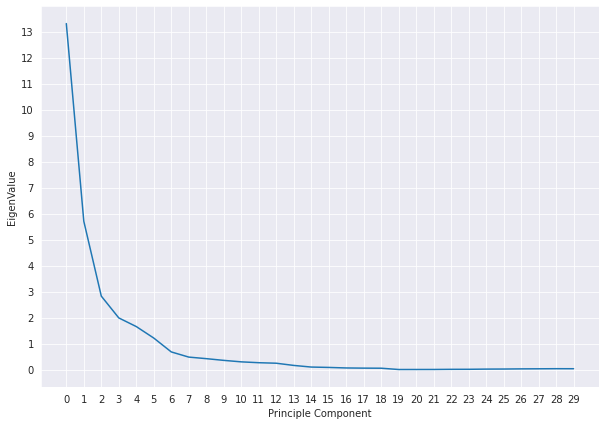

In [ ]:
#elbow curve
plt.figure(figsize = (10 ,7))
plt.plot(values)
plt.xticks(np.arange(0 , 30, 1))
plt.yticks(np.arange(0 , 14, 1))
plt.xlabel('Principle Component')
plt.ylabel('EigenValue')
plt.show()

In [ ]:
vectors

array([[0.22, -0.23, -0.01, 0.04, -0.04, 0.02, 0.12, 0.01, -0.22, 0.10,
        0.04, 0.05, 0.01, -0.06, 0.05, -0.15, 0.20, 0.15, -0.23, -0.70,
        0.21, -0.21, -0.13, 0.13, 0.02, -0.18, 0.10, -0.07, -0.05, 0.07],
       [0.10, -0.06, 0.06, -0.60, 0.05, -0.03, -0.01, -0.13, 0.11, 0.24,
        -0.30, 0.25, 0.20, 0.02, 0.11, -0.16, -0.04, -0.04, -0.03, -0.00,
        -0.01, 0.00, -0.02, 0.02, -0.08, 0.10, 0.00, -0.09, -0.24, -0.45],
       [0.23, -0.22, -0.01, 0.04, -0.04, 0.02, 0.11, 0.02, -0.22, 0.09,
        0.02, 0.04, 0.04, -0.05, 0.04, -0.11, 0.19, 0.16, -0.24, 0.69,
        0.38, -0.08, -0.12, 0.13, -0.03, -0.12, 0.04, -0.08, -0.02, 0.07],
       [0.22, -0.23, 0.03, 0.05, -0.01, -0.00, 0.05, -0.03, -0.20, 0.07,
        0.11, 0.07, 0.07, -0.01, -0.01, -0.13, 0.26, 0.27, 0.03, 0.03,
        -0.42, 0.27, 0.47, -0.36, 0.21, 0.07, -0.01, -0.10, -0.09, 0.02],
       [0.14, 0.19, -0.10, 0.16, 0.37, -0.29, 0.14, 0.29, 0.01, -0.07,
        -0.14, 0.32, 0.05, -0.45, 0.12, -0.20, 0.17, 

In [ ]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append((values[i] / np.sum(values)))
 
print(np.sum(explained_variances), explained_variances)

1.0000000000000002 [0.4427202560752635, 0.18971182044033094, 0.09393163257431393, 0.06602134915470136, 0.05495768492346264, 0.0402452203988335, 0.022507337129825087, 0.015887238000213265, 0.013896493745591106, 0.011689781894131472, 0.00979718987598018, 0.008705379007378833, 0.00804524987196732, 0.005233657454926345, 0.0031378321676274012, 0.0026620933651523133, 0.0019799679253242725, 0.001753959450226369, 0.001649253059225158, 4.434827427366115e-06, 2.4960103246894993e-05, 5.297792903809151e-05, 0.00023001546250595888, 0.0002725879954774841, 0.0005160423791651986, 0.0006018335666716705, 0.0008113612588991011, 0.0009146467510543433, 0.0010386467483387114, 0.0009990964637002567]


In [ ]:
projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
projected_3=X_scaled.dot(vectors.T[2])
projected_4=X_scaled.dot(vectors.T[3])
projected_5=X_scaled.dot(vectors.T[4])
projected_6=X_scaled.dot(vectors.T[5])
PCA_X = pd.DataFrame(projected_1, columns=['PCA1'])
PCA_X['PCA2'] = projected_2
PCA_X['PCA3'] = projected_3
PCA_X['PCA4'] = projected_4
PCA_X['PCA5'] = projected_5
PCA_X['PCA6'] = projected_6
PCA_X

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
0,9.192837,1.948583,-1.123166,3.633731,1.195110,1.411424
1,2.387802,-3.768172,-0.529293,1.118264,-0.621775,0.028656
2,5.733896,-1.075174,-0.551748,0.912083,0.177086,0.541452
3,7.122953,10.275589,-3.232790,0.152547,2.960878,3.053422
4,3.935302,-1.948072,1.389767,2.940639,-0.546747,-1.226495
...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,0.074824,-2.375193
565,3.793382,-3.584048,2.088476,-2.506028,0.510723,-0.246710
566,1.256179,-1.902297,0.562731,-2.089227,-1.809991,-0.534447
567,10.374794,1.672010,-1.877029,-2.356031,0.033742,0.567936


#Model Implementation(With PCA)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(PCA_X,y,test_size = 0.2,random_state=42)

#### **K-Nearest-Neighbors (kNN)**

In [ ]:
#Making K-Nearest-Neighbors (KNN) Model
knn = KNeighborsClassifier(n_neighbors=1)
start = time.time()
knn.fit(X_train, y_train)
stop = time.time()
knn_time = f"{stop - start}"

In [ ]:
#Making predictions on test data
y_pred_knn = knn.predict(X_test)

#Displaying the predictions
y_pred_knn

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [ ]:
#AUC Score
auc_score_knn = roc_auc_score(y_test, knn.predict(X_test))
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
print("AUC Score:",auc_score_knn)

AUC Score: 0.9556174254831314


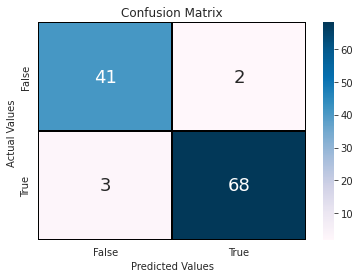

In [ ]:
#Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

#Plotting the confusion matrix
ax = sns.heatmap(cm_knn, annot=True, annot_kws={"fontsize":18}, cmap='PuBu', fmt='.3g', linewidths=1, linecolor='black')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



#### **Random Forest Classifier**

In [ ]:
#Making DecisionTree Classifier Model
rfc = RandomForestClassifier()
start = time.time()
rfc.fit(X_train, y_train)
stop = time.time()
rfc_time = f"{stop - start}"

In [ ]:
#Making predictions on test data
y_pred_rfc = rfc.predict(X_test)

#Displaying the predictions
y_pred_rfc

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [ ]:
#AUC Score
auc_score_rfc = roc_auc_score(y_test, rfc.predict(X_test))
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
print("AUC Score:",auc_score_rfc)

AUC Score: 0.9556174254831314


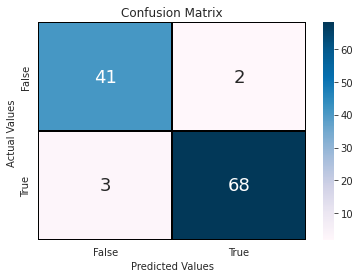

In [ ]:
#Confusion Matrix
cm_rfc = confusion_matrix(y_test, y_pred_rfc)

#Plotting the confusion matrix
ax = sns.heatmap(cm_rfc, annot=True, annot_kws={"fontsize":18}, cmap='PuBu', fmt='.3g', linewidths=1, linecolor='black')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



#### **Logistic Regression**

In [ ]:
#Making LogisticRegression Model
classifier = LogisticRegression()
start = time.time()
classifier.fit(X_train,y_train)
stop = time.time()
log_time = f"{stop - start}"

In [ ]:
#Making predictions on test data
y_pred_log = classifier.predict(X_test)

#Displaying the predictions
y_pred_log

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [ ]:
#AUC Score
auc_score_classifier = roc_auc_score(y_test, classifier.predict(X_test))
fpr_classifier, tpr_classifier, thresholds_classifier = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
print("AUC Score:",auc_score_classifier)

AUC Score: 0.9813298395021289


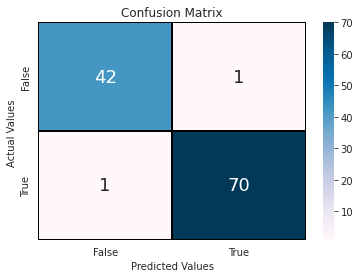

In [ ]:
#Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)

#Plotting the confusion matrix
ax = sns.heatmap(cm_log, annot=True, annot_kws={"fontsize":18}, cmap='PuBu', fmt='.3g', linewidths=1, linecolor='black')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



#### **Support Vector Machines (SVM) Linear**

In [ ]:
#Making Support Vector Machines (SVM) Model
svm = SVC(probability=True, kernel = 'linear')
start = time.time()
svm.fit(X_train, y_train)
stop = time.time()
svm_time = f"{stop - start}"

In [ ]:
#Making predictions on test data
y_pred_svm = svm.predict(X_test)

#Displaying the predictions
y_pred_svm

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [ ]:
#AUC Score
auc_score_svm = roc_auc_score(y_test, svm.predict(X_test))
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
print("AUC Score:",auc_score_svm)

AUC Score: 0.9813298395021289


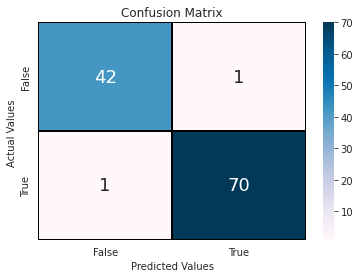

In [ ]:
#Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

#Plotting the confusion matrix
ax = sns.heatmap(cm_svm, annot=True, annot_kws={"fontsize":18}, cmap='PuBu', fmt='.3g', linewidths=1, linecolor='black')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



#### **ROC Curve**

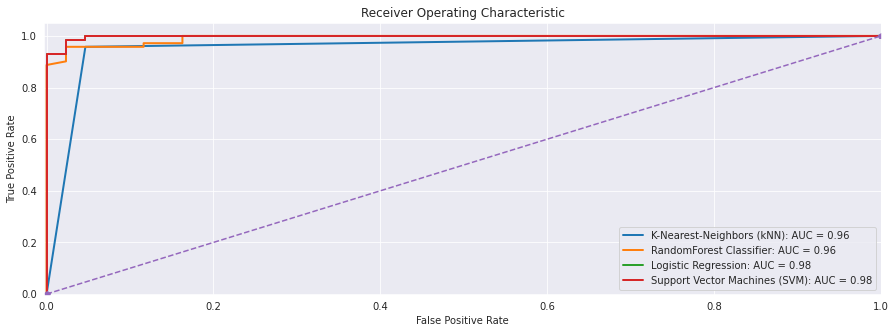

In [ ]:
#Plotting the ROC Curve
plt.figure(figsize=(15,5))
plt.plot(fpr_knn, tpr_knn, label='K-Nearest-Neighbors (kNN): AUC = %0.2f' % auc_score_knn, linewidth=2)
plt.plot(fpr_rfc, tpr_rfc, label='RandomForest Classifier: AUC = %0.2f' % auc_score_rfc, linewidth=2)
plt.plot(fpr_classifier, tpr_classifier, label='Logistic Regression: AUC = %0.2f' % auc_score_classifier, linewidth=2)
plt.plot(fpr_svm, tpr_svm, label='Support Vector Machines (SVM): AUC = %0.2f' % auc_score_svm, linewidth=2)
plt.plot([0, 1], [0, 1],'p--')
plt.xlim([-0.003, 1.0])
plt.ylim([-0.003, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

#### **Evaluation Metrics**

In [ ]:
accuracy_knn = accuracy_score(y_test,y_pred_knn)
accuracy_rfc=accuracy_score(y_test,y_pred_rfc)
accuracy_log=accuracy_score(y_test,y_pred_log)
accuracy_svm=accuracy_score(y_test,y_pred_svm)

In [ ]:
#Evaluation Metrics for different models
columns = ['Model(With PCA)', 'Accuracy', 'Running Time(s)']
evaluation_met = pd.DataFrame(columns=columns)
evaluation_met['Model(With PCA)'] = ['K-Nearest Neighbor Classifier', 'RandomForestClassifier', 'Logistic Regression', 'SVM(linear)']
evaluation_met['Accuracy'] = [accuracy_knn, accuracy_rfc, accuracy_log, accuracy_svm]
evaluation_met['Running Time(s)'] = [knn_time, rfc_time, log_time, svm_time]

evaluation_met

,Model(With PCA),Accuracy,Running Time(s)
0,K-Nearest Neighbor Classifier,0.956140,0.015156030654907227
1,RandomForestClassifier,0.956140,0.20540881156921387
2,Logistic Regression,0.982456,0.016574859619140625
3,SVM(linear),0.982456,0.020048141479492188
